In [1]:
%reload_ext autoreload
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0,'/home/aw1223/ip/agile/imports/neural-lam')
sys.path.insert(0,'/home/aw1223/ip/agile/imports/neural-lam/neural_lam')

sys.path.insert(0,'/home/aw1223/ip/agile')


import torch


from neural_lam.models.graph_lam import GraphLAM
from neural_lam.weather_dataset import WeatherDataset
from neural_lam.utils import make_mlp
from neural_lam.interaction_net import InteractionNet

from sdk.ample import Ample


import argparse
# Manually create the args Namespace object with the desired parameters
args = argparse.Namespace(
    dataset='meps_example',
    model='graph_lam',
    subset_ds=0,
    seed=42,
    n_workers=1,
    epochs=1,
    batch_size=1,
    load=None,
    restore_opt=0,
    precision=32,
    graph='1level',
    hidden_dim=64,
    hidden_layers=1,
    processor_layers=1,
    mesh_aggr='sum',
    output_std=0,
    ar_steps=1,
    control_only=0,
    loss='wmse',
    step_length=1,
    lr=0.001,
    val_interval=1,
    eval='test',
    n_example_pred=1
)
print('Neural LAM Args', args)
#Change to neural-lam directory
%cd /home/aw1223/ip/worktree_a/imports/neural-lam

eval_loader = torch.utils.data.DataLoader(
                WeatherDataset(
                    args.dataset,
                    pred_length=1,
                    split="test",
                    subsample_step=args.step_length,
                    subset=bool(args.subset_ds),
                ),
                args.batch_size,
                shuffle=False,
                num_workers=args.n_workers,
            )


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/aw1223/anaconda3/envs/ample/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Neural LAM Args Namespace(dataset='meps_example', model='graph_lam', subset_ds=0, seed=42, n_workers=1, epochs=1, batch_size=1, load=None, restore_opt=0, precision=32, graph='1level', hidden_dim=64, hidden_layers=1, processor_layers=1, mesh_aggr='sum', output_std=0, ar_steps=1, control_only=0, loss='wmse', step_length=1, lr=0.001, val_interval=1, eval='test', n_example_pred=1)
/home/aw1223/ip/worktree_a/imports/neural-lam


In [2]:
ample = Ample()
model = GraphLAM(args)

Loaded graph with 70345 nodes (63784 grid, 6561 mesh)
Edges in subgraphs: m2m=51520, g2m=100656, m2g=255136


Moving model to Ample
Compiling model


----------------------------------------
grid_features
tensor([[[ 0.5972,  0.3314,  0.2332,  ..., -0.9964,  0.0135,  1.0000],
         [ 0.5935,  0.3013,  0.4257,  ..., -0.9964,  0.0134,  1.0000],
         [ 0.5896,  0.3155,  0.5625,  ..., -0.9964,  0.0139,  1.0000],
         ...,
         [-0.4083,  1.8435,  1.7869,  ...,  1.0000,  0.1689,  1.0000],
         [ 0.0794,  1.8456,  1.7753,  ...,  1.0000,  0.1180,  1.0000],
         [ 0.1553,  1.7835,  1.7753,  ...,  1.0000,  0.1094,  1.0000]]])
Shape: torch.Size([1, 63784, 54])
----------------------------------------
g2m_features
tensor([[ 0.5000, -0.3319, -0.3739],
        [ 0.3884, -0.1050, -0.3739],
        [ 0.3933,  0.1218, -0.3739],
        ...,
        [ 0.3933, -0.1218,  0.3739],
        [ 0.3884,  0.1050,  0.3739],
        [ 0.5000,  0.3319,  0.3739]])
Shape: torch.Size([100656, 3])
----------------------------------------
edge_index1
tensor([[ 6561,  6562,  6563,  ..., 70342, 70343, 70344],
        [    0,     0,     0,  ...,  

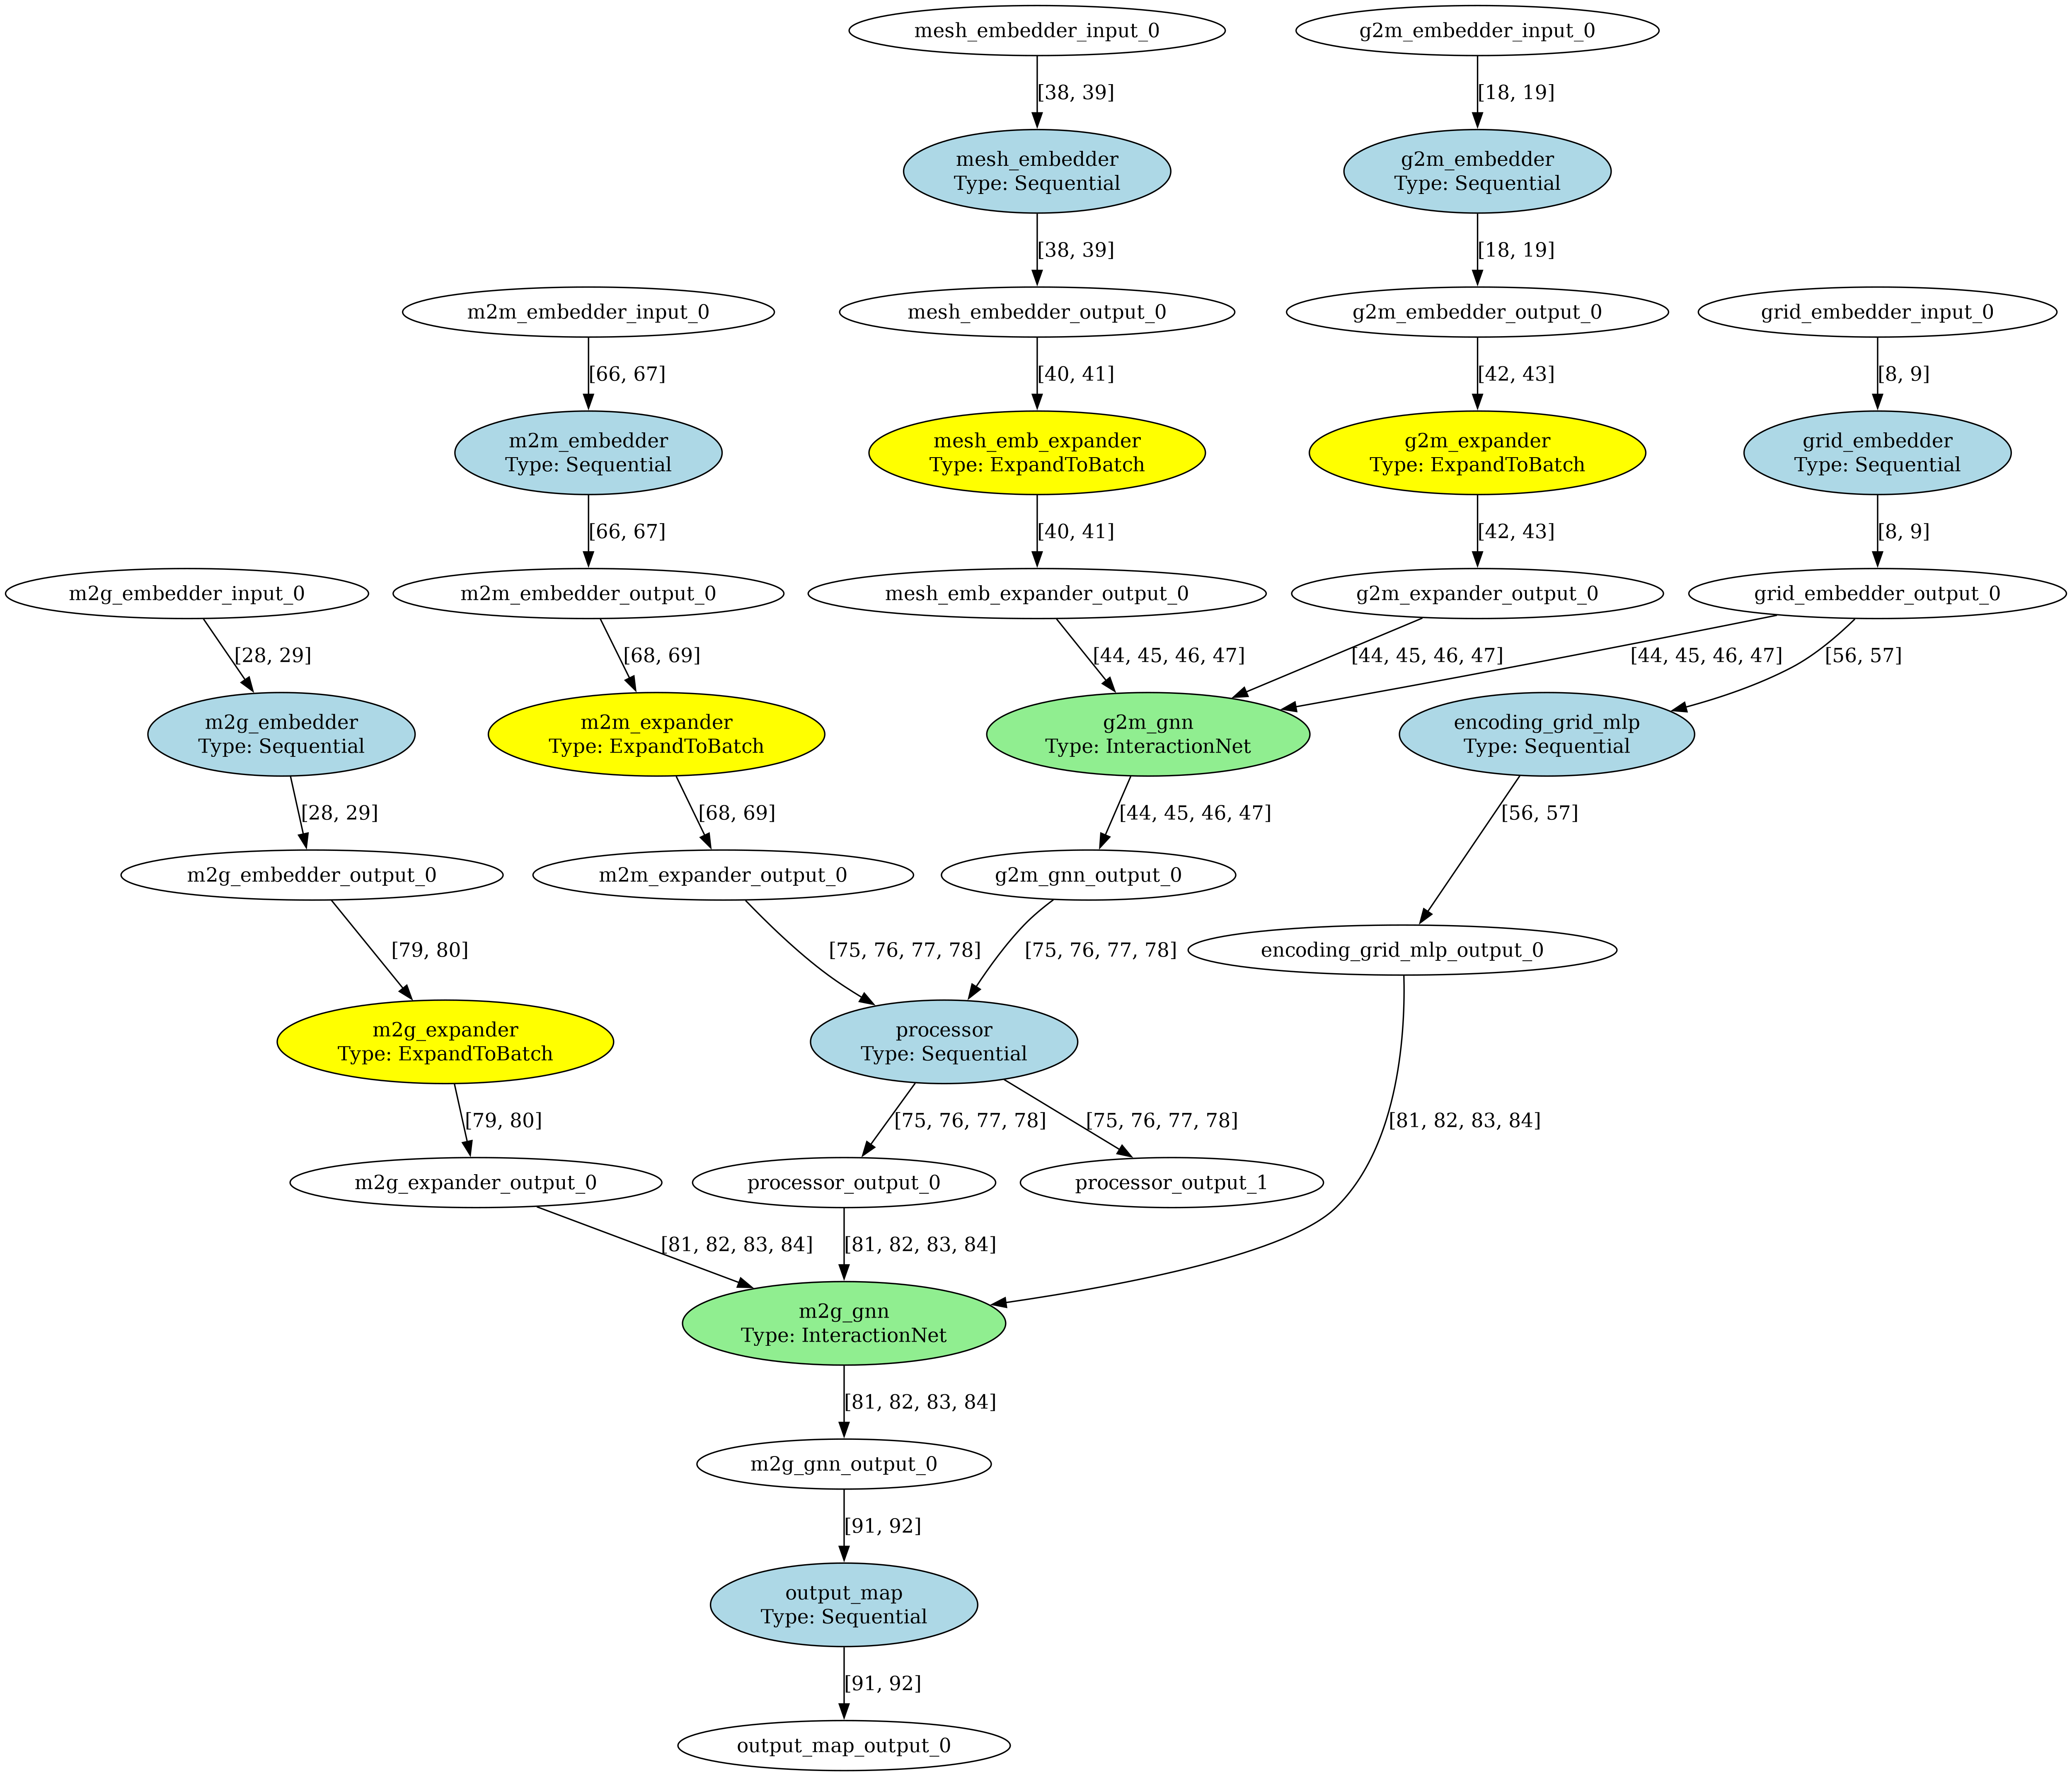

In [3]:
model.to_device('ample',data_loader=eval_loader)
